Installation des dépendances

In [217]:
import matplotlib.pyplot as plt # afficher des graphiques pour voir l'evolution de notre apprentissage 
import tensorflow as tf # tensorflow
import numpy as np # manipuler des vecteurs et des matrices 
import pandas as pd # gerer beaucoup de données
import sys # autres imports

from sklearn.preprocessing import StandardScaler # standardisateur de données

In [218]:
assert hasattr(tf, "function") # vérifer que notre vertion est bien tensrflow 2.0

In [219]:
from tensorflow import keras #keras est .....
from sklearn.model_selection import train_test_split # importation de données de test


fashion_mnist = keras.datasets.fashion_mnist #c'est une base de données avec des images des vetements 28X28 avec differents couleurs de 0 à 255
(images, targets), (_,_) = fashion_mnist.load_data() #on recupere les images et les targets de la BDD


images = images[:10000]; targets = targets [:10000]#on utilise que 10 000 images et targets de la base de données

print (images.shape); print (targets.shape)#a chaque fois qu'on a une base de données, il faut la print pour voir ce qu'elle a

#print(images[1]) #Afficher une image
print(images.mean()); print(images.std())# afficher la moyenne et afficher l ecart type 

images = images.reshape(-1, 784); images = images.astype(float)# objectif diminuer la moyenne et l ecart type pour qu'elle soit proche de 0

scaler = StandardScaler() ; images = scaler.fit_transform(images)# standardisation des données

print("\n", images.mean()) ; print(images.std())# afficher la moyenne et  l ecart type apres standardisation

#print(images[0]) #afficher la premiere image

# appel des données de test et entrainement. On veut 20% des données de test (les images test et entrainement et les targets test et entrainements)
images_train, images_test, targets_train, targets_test = train_test_split(images, targets, test_size=0.2, random_state=1)


print("\n8000 images et labels d'entrainement :", images_train.shape, targets_train.shape)
print("\n2000  images et labels de tests :", images_test.shape, targets_test.shape)


(10000, 28, 28)
(10000,)
73.00877385204082
90.2745808471392

 -1.0476880134421886e-18
1.0000000000000007

8000 images et labels d'entrainement : (8000, 784) (8000,)

2000  images et labels de tests : (2000, 784) (2000,)


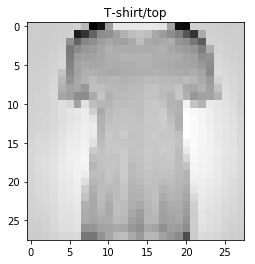

In [220]:
#Creation des classes associees a chaque target 

targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneacker", "Bag", "Ankle boot"]

#plot one image 
# si on change le nombre 11 par 10 on est sur une autre image
plt.imshow(images[10].reshape(28,28), cmap="binary")
plt.title(targets_names[targets[10]])

plt.show()

In [221]:
print("frist line of one image", images[11])
print("Associated targets", targets[11])

frist line of one image [-0.01426971 -0.02645579 -0.029489   -0.04635542 -0.06156617 -0.07641125
 -0.10509579 -0.16410192 -0.23986957 -0.36929666 -0.57063232 -0.6909092
 -0.7582382  -0.74450346 -0.17093142  0.80572169  0.60465021  0.69474334
  0.01007169 -0.32085836 -0.20882718 -0.14379861 -0.11434416 -0.09302065
  0.08584529 -0.04969764 -0.03368099 -0.01591863 -0.0181322  -0.02297209
 -0.03365679 -0.05814043 -0.08287213 -0.13053264 -0.2464668  -0.35905423
 -0.48335079 -0.63909239 -0.83575443 -0.98917162 -1.08347998 -1.07712864
  0.7931674   1.2496451   1.35025207  1.68512162  1.97595936  1.43181167
  2.97956664  4.68907298  4.88750284  0.23595608 -0.11565956  0.14562865
 -0.06100298 -0.03312088 -0.01964757 -0.02793878 -0.0481181  -0.07617253
 -0.12670992 -0.26684818 -0.39945708 -0.49720396 -0.62326614 -0.8195795
 -0.99379417 -1.04759214 -1.10371252 -1.10221791  1.08283564  1.22639277
  1.35310524  1.34234162  1.66433217  2.15862735  2.75297169  3.22113197
  4.62472272  3.87445967 -0.1

Creation du modele

In [222]:
#### ADD THE LAYERS

model = keras.models.Sequential()# un cree un modele de type sequence pour pouvoir faire des modifications sur l'image 


# add the layers 
model.add(tf.keras.layers.Dense(256, activation="relu"))
# on definit un calque a un layer de 256 neurones
model.add(tf.keras.layers.Dense(128, activation="relu"))
# on definit un calque a un layer de 128 neurones
model.add(tf.keras.layers.Dense(10, activation="softmax"))
# on definit un calque de 10 neurones a la sortie 

model_output = model.predict(images[0:1]) # on fait une prediction sur ma premiere image 

print(model_output, targets[0:1])# on affiche la prediction 
# le 1 est l'adition des valeurs de sortie soient egale a 1. c'est des probabilitées

#https://stackoverflow.com/questions/54677761/deprecation-warning-how-to-remove-tf-keras-warning-calling-variancescaling-i




# LE MODELE S INITIALISE A CHAQUE FOIS DONC DES PROBABILITE DIFERENTES



[[0.1100454  0.07073931 0.03989193 0.15572557 0.40709853 0.05730205
  0.02638768 0.00727064 0.08746994 0.03806895]] [9]


In [223]:
### resume du modele qui vient d'etre cree
model.summary()
## "Trainable param" est le nombre de parametres qui peuvent etre modifies par le tensorflow automatiquement dans le but de reduire l'erreur.


Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             multiple                  200960    
_________________________________________________________________
dense_55 (Dense)             multiple                  32896     
_________________________________________________________________
dense_56 (Dense)             multiple                  1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [224]:
### Compile the model 

# definire une descente de gradient pour optimiser le code 

model.compile(
    loss="sparse_categorical_crossentropy", # le loss est le resultat de l'erreur actuelle 
    optimizer="sgd",
    metrics=["accuracy"] #c est un pourcentage
) 



La fonction d'erreur

In [225]:
# prends 5 images et les 5 labels des 5 images 

images_test = images[:5]
labels_test = targets[:5] 

# afficher 5 images de 784 valeurs 
print(images_test.shape)

# afficher les labels. nous avons donc 3 labels (9,0 et 3)
print(labels_test)

# on fait une prediction sur les 5 images qu on lui a donné 
outputs_test = model.predict(images_test)
# afficher la prediction des 5 images. chaque prediction a 10 valeurs
print(outputs_test.shape)

# afficher les valeurs des 5 images. le total est egal a 1. 
print("\nOutputs", outputs_test)

filtered_crossentropy = outputs_test[np.arange(5), labels_test]
print("\nOutputs filtered ", filtered_crossentropy) # la prediction selectionne les probabilitées qui sont des notre classe donc 9,0,0,3,0

log_filterred = np.log(filtered_crossentropy)# minimiser l'erreur il faut prendre le log des probailitées filtrées

print("\nlog filtered output", log_filterred) #afficher les log des probabilitées filtrées

print("\nMoyenne" , log_filterred.mean()) #afficher la moyenne des log des probabilitées filtrées 

print("\ninverse de la Moyenne" , -log_filterred.mean()) #afficher l'inverse de la moyenne des log des probabilitées filtrées pour maximiser les resultats des classes qui nous interesse









(5, 784)
[9 0 0 3 0]
(5, 10)

Outputs [[0.1100454  0.07073928 0.0398919  0.1557256  0.40709862 0.05730208
  0.02638769 0.00727064 0.08746992 0.03806896]
 [0.11386015 0.05099075 0.05401206 0.02820432 0.04252179 0.16610277
  0.160799   0.02653343 0.3375581  0.01941766]
 [0.28922248 0.13363998 0.04577867 0.02456562 0.18220896 0.14040175
  0.03114116 0.02518315 0.08458858 0.04326965]
 [0.17470434 0.11002226 0.19828667 0.04084194 0.147865   0.09766786
  0.04931184 0.05487408 0.07452123 0.05190477]
 [0.21753901 0.16751355 0.03302731 0.03416658 0.0695822  0.17075416
  0.09619974 0.06077255 0.13232526 0.0181196 ]]

Outputs filtered  [0.03806896 0.11386015 0.28922248 0.04084194 0.21753901]

log filtered output [-3.268356  -2.1727843 -1.2405591 -3.1980457 -1.525377 ]

Moyenne -2.2810245

inverse de la Moyenne 2.2810245


Former le modèle

In [226]:

#lancement de l'apprentissage
history = model.fit(images_train, targets_train, epochs=10, validation_split=0.2) 
#"epochs=10" c'est un passage de 10 fois sur tout le dataset en reduisant l'erreur

# le "acc" est le nombre de resultats qui ont ete realises
# "val_loss" est l'erreur sur la validation 
# "val_acc" est l'erreur sur la precision de notre modele



Train on 6400 samples, validate on 1600 samples
Epoch 1/10
6400/6400 [==============================] - 1s 136us/sample - loss: 0.9369 - acc: 0.6908 - val_loss: 0.6686 - val_acc: 0.7700
Epoch 2/10
6400/6400 [==============================] - 1s 109us/sample - loss: 0.5566 - acc: 0.8084 - val_loss: 0.5594 - val_acc: 0.7962
Epoch 3/10
6400/6400 [==============================] - 1s 106us/sample - loss: 0.4644 - acc: 0.8395 - val_loss: 0.5238 - val_acc: 0.8106
Epoch 4/10
6400/6400 [==============================] - 1s 106us/sample - loss: 0.4141 - acc: 0.8592 - val_loss: 0.4952 - val_acc: 0.8194
Epoch 5/10
6400/6400 [==============================] - 1s 105us/sample - loss: 0.3768 - acc: 0.8708 - val_loss: 0.4807 - val_acc: 0.8269
Epoch 6/10
6400/6400 [==============================] - 1s 108us/sample - loss: 0.3474 - acc: 0.8811 - val_loss: 0.4696 - val_acc: 0.8275
Epoch 7/10
6400/6400 [==============================] - 1s 108us/sample - loss: 0.3230 - acc: 0.8914 - val_loss: 0.4567 - va

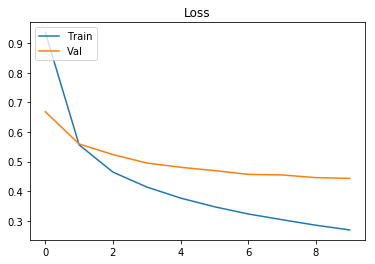

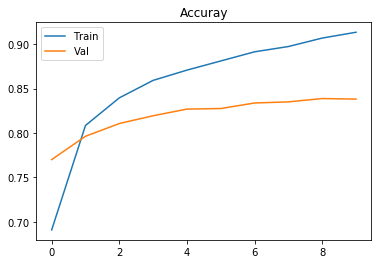

In [227]:
#print(history.history)#affichage de l'historique 

loss_curve =history.history["loss"]
acc_curve = history.history["acc"]

loss_val_curve =history.history["val_loss"]
acc_val_curve = history.history["val_acc"]

plt.plot(loss_curve, label="Train")
plt.plot(loss_val_curve, label="Val")
plt.legend(loc= 'upper left')
plt.title("Loss")
plt.show()


plt.plot(acc_curve, label="Train")
plt.plot(acc_val_curve, label="Val")
plt.legend(loc= 'upper left')
plt.title("Accuray")
plt.show()